In [68]:
import cv2 #used to grayscale and resize images 
import numpy as np #dealing with arrays 
import os #deal with directories 
from random import shuffle #mixing up our currently ordered data that might lead our network astray in training 
from tqdm import tqdm #a nice pretty percentage bar for tasks.  

from PIL import Image
import matplotlib.pyplot as plt

In [9]:
TRAIN_DIR= 'I:/train/train'
TEST_DIR = 'I:/test1/test1'
IMG_SIZE = 50 

In [8]:
#creates labels, then creates an array that includes the image and appropriate label
def label_img(img): 
    word_label = img.split('.')[-3]
    #conversion to binary array [cat,dog]
    # [cat, not dog]
    if word_label == 'cat': return [1,0]
    # [not cat, dog]
    elif word_label == 'dog': return [0,1] 

def create_train_data(): 
    training_data = [] 
    for img in tqdm(os.listdir(TRAIN_DIR)): 
        label = label_img(img)
        path = os.path.join(TRAIN_DIR,img)
        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        training_data.append([np.array(img),np.array(label)])
    shuffle(training_data) 
    np.save('train_data.npy', training_data)
    return training_data 

In [10]:
train_data = create_train_data()

100%|██████████| 25000/25000 [00:58<00:00, 428.23it/s]


In [19]:
#does the same thing for unlabeled test data 
def process_test_data(): 
    testing_data = [] 
    for img in tqdm(os.listdir(TEST_DIR)): 
        path = os.path.join(TEST_DIR,img)
        img_num = img.split('.')[0]
        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE)) 
        testing_data.append([np.array(img), img_num])
    shuffle(testing_data)
    np.save('test_data.npy', testing_data)
    return testing_data

In [20]:
##Split training and testing data
train = train_data[:-500]
test = train_data[-500:]

In [109]:
def reshape_response(Y): 
    train_Y = [] 
    for i in Y: 
        if i[0]==1 and i[1]==0:
            train_Y.append(1)
        else: 
            train_Y.append(0) 
    n = len(train_Y)
    train_Y = np.array(train_Y).reshape((n,1))
    return train_Y

def flatten_features(X): 
    container = []
    m,n,p,q = np.shape(X)
    for i in range(0,m): 
        temp = X[i].flatten()
        container.append(temp)
    flat_array = np.vstack(container)
    return flat_array

In [118]:
##Create data arrays, split into feature and response 
trainX = np.array([i[0] for i in train]).reshape(-1,IMG_SIZE,IMG_SIZE,1) 
trainX = flatten_features(trainX)
trainY = [i[1] for i in train]
trainY = reshape_response(trainY)

testX = np.array([i[0] for i in test]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
testX = flatten_features(testX)
testY = [i[1] for i in test]
testY = reshape_response(testY)

In [111]:
#import the model from sklearn
from sklearn.linear_model import LogisticRegression

In [112]:
#Make an instance of the model
logreg = LogisticRegression()

In [121]:
#Fit a model on the training data
logreg.fit(trainX,trainY.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [123]:
#Predict labels for the new data 
predictions = logreg.predict(testX)

In [126]:
#Measure Model Performance: accuracy score 
score = logreg.score(testX,testY)
print(score)

0.558


In [128]:
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import metrics

In [129]:
#Confusion Matrix
cm = metrics.confusion_matrix(testY, predictions)
print(cm)

[[112 115]
 [106 167]]


Text(0.5,1,'Accuracy Score: 0.558')

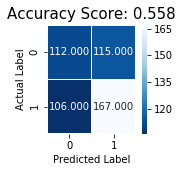

In [132]:
#Seaborn Confusion Matrix 
plt.figure(figsize=(2,2))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, cmap= 'Blues_r')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

In [ ]:
##Special Thanks to Harrison "sentdex" Kinsley and Michale Galarnyk for their amazing tutorials that made this possible: 
#https://pythonprogramming.net/convolutional-neural-network-kats-vs-dogs-machine-learning-tutorial/#
#https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a

#data courtesy of Kaggle: https://www.kaggle.com/c/dogs-vs-cats/overview

##Possible improvements: 
#use train_test_split and enable "stratify" to ensure even distribution of classes.
#standardize the data in advance of model fitting and testing 